In [1]:
import numpy as np
from scipy.integrate import odeint
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt
from time import time
import pandas as pd

In [2]:
df = pd.read_csv('Data/covid19-data-Canada.csv', parse_dates=['date'])
regions = ['Canada', 'Ontario', 'Quebec', 'British Columbia', 'Alberta', 'Saskatchewan', 'Manitoba']
populations = [38, 14.7, 8.6, 5.15, 4.4, 1.18, 1.38]
df.head()

,pruid,prname,prnameFR,date,update,numconf,numprob,numdeaths,numtotal,numtested,...,ratedeaths_last14,numtotal_last7,ratetotal_last7,numdeaths_last7,ratedeaths_last7,avgtotal_last7,avgincidence_last7,avgdeaths_last7,avgratedeaths_last7,raterecovered
0,35,Ontario,Ontario,2020-01-31,NaN,3,0.0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
1,59,British Columbia,Colombie-Britannique,2020-01-31,NaN,1,0.0,0.0,1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
2,1,Canada,Canada,2020-01-31,NaN,4,0.0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
3,35,Ontario,Ontario,2020-02-08,NaN,3,0.0,0.0,3,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0
4,59,British Columbia,Colombie-Britannique,2020-02-08,NaN,4,0.0,0.0,4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [3]:
run -i Skeleton.py

Below we take real data for removed in Ontario, Canada
(The real data covers the period between July 17, 2020 and January 8, 2021)

In [4]:
places = {0 : 'Canada', 1: 'Ontario', 2: 'Quebec', 3: 'British Columbia', 4: 'Alberta', 5: 'Saskatchewan', 6: 'Manitoba'}
i = 0
place = regions[i]
place = places[i]
N = populations[i]*1e6
print ((place))

Canada


t start 2020-07-17 00:00:00 
t end 2021-01-08 00:00:00


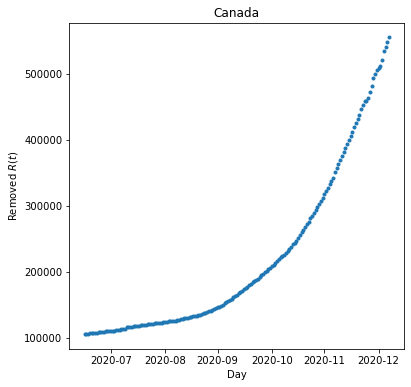

In [5]:
condition = df['prname'] == place
Place = df[condition]
t_ont = Place.date
rem_ont = Place.numdeaths + Place.numrecover
start, end = 144, 319


rem_ont = rem_ont.tolist()
t_ont = t_ont.tolist()
print('t start', t_ont[start], '\nt end', t_ont[end])

#print(t_ont)
#print(type(act_ont))


fig, ax = plt.subplots(figsize=(6, 6))
plt.scatter(t_ont[start:end],rem_ont[start:end], marker='.')

# Define the date format (from matplotlib.dates import DateFormatter)
#date_form = DateFormatter("%m-%y")
#ax.xaxis.set_major_formatter(date_form)

plt.ylabel('Removed $R(t)$')
plt.xlabel('Day')
plt.title(place)


plt.show()

Below we take real data for removed in Ontario, Canada for the same period of time as above.

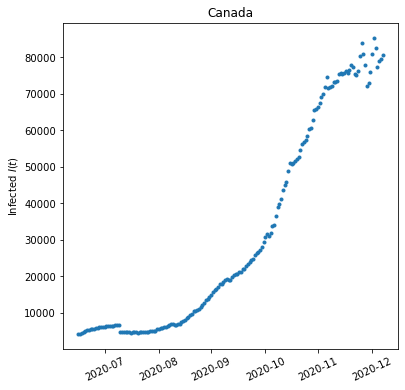

In [6]:
act_ont = Place.numactive
act_ont = act_ont.tolist()

fig, ax = plt.subplots(figsize=(6, 6))
plt.xticks(rotation=25)
plt.scatter(t_ont[start:end],act_ont[start:end], marker='.')

plt.ylabel('Infected $I(t)$')

plt.title(place)

plt.show()


 $\log\left(\frac{S(t)}{S(t_s)}\right) = -\frac{R_0}{N}\cdot(R(t)-R(t_s))$

In [7]:
Susc = N - np.array(act_ont[start:end]) - np.array(rem_ont[start:end])
Rem = np.array(rem_ont[start:end])
lhs1 = np.log(Susc / Susc[0])
rhs1 = Rem

R_0, _ = curve_fit(linear_func, rhs1, lhs1)


$R(t) - R(t_s) = \gamma \int_{t_s}^t I(\tau) \mathrm{d}\tau$

In [8]:
Infec = np.array(act_ont[start:end])
lhs2 = np.array(rhs1)
t = np.arange(0,len(Infec))
rhs2 =  integrate(Infec, t) #insert Matteo's function
beta, b = np.polyfit(rhs2, lhs2-lhs2[0], 1)
print("beta =", beta)
print("R_0 =", R_0[0])
print("gamma =", beta/R_0[0])

beta = 0.08274791144826055
R_0 = 1.2352553317734292
gamma = 0.06698850781680997


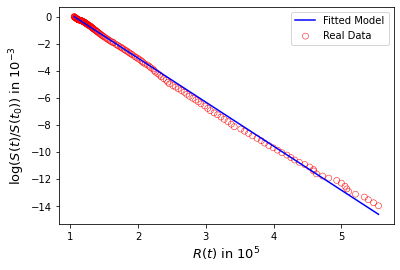

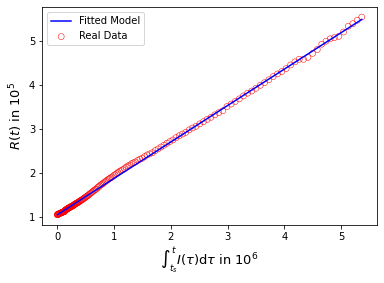

In [9]:
plt.scatter(rhs1/1e5, lhs1/1e-3, facecolors='none', edgecolors='r', linewidths=0.5,label = "Real Data")
plt.xlabel("$R(t)$ in $10^5$", fontsize=13)
plt.ylabel("$\log(S(t)/S(t_0))$ in $10^{-3}$", fontsize=13)
plt.plot(rhs1/1e5, linear_func(rhs1, R_0)/1e-3, c = 'b', label = "Fitted Model")
plt.legend()
plt.show()

plt.scatter(rhs2/1e6, lhs2/1e5, facecolors='none', edgecolors='r', linewidths=0.5,label = "Real Data")
plt.plot(rhs2/1e6, (beta * rhs2 + lhs2[0])/1e5, c = 'b', label = "Fitted Model")
plt.xlabel(r'$\int_{t_s}^t I(\tau) \mathrm{d}\tau$ in $10^6$', fontsize=13)
plt.ylabel('$R(t)$ in $10^5$', fontsize=13)
plt.legend()
plt.show()
